In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [16]:
from sklearn.linear_model import LogisticRegression

In [2]:
import os

In [4]:
os.chdir('C:/Users/adele/OneDrive/Documents/2024_WINTER/COSC3117/ass4 docs')

In [8]:
# Load datasets
train_df = pd.read_csv("titanic_train.csv")
test_df = pd.read_csv("titanic_test.csv")

In [22]:
# Preprocessing steps
# Drop 'cabin' and 'ticket' due to high missing values and low predictive power, respectively
X_train = train_df.drop(['survived', 'cabin', 'ticket', 'name'], axis=1)
y_train = train_df['survived']
X_test = test_df.drop(['survived', 'cabin', 'ticket', 'name'], axis=1)
y_test = test_df['survived']

In [25]:
X_train

,pclass,sex,age,sibsp,parch,fare,embarked
0,2,male,29.0,0,0,10.5000,S
1,3,female,NaN,0,0,7.6292,Q
2,3,male,25.0,1,0,7.7750,S
3,3,male,39.0,1,5,31.2750,S
4,3,male,33.0,0,0,9.5000,S
...,...,...,...,...,...,...,...
886,1,male,21.0,0,1,61.3792,C
887,1,female,59.0,2,0,51.4792,S
888,2,male,27.0,0,0,13.0000,S
889,2,male,43.0,0,1,21.0000,S


In [23]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
886    1
887    1
888    0
889    0
890    0
Name: survived, Length: 891, dtype: int64

In [24]:
y_test

0      1
1      1
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    1
417    0
Name: survived, Length: 418, dtype: int64

In [32]:
# Numeric features and their transformer
numeric_features = ['age', 'fare', 'sibsp', 'parch']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [33]:
# Categorical features and their transformer
categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [28]:
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [34]:
# Combine preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [35]:
# Create and train the logistic regression pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

In [19]:
X_train

,pclass,sex,age,sibsp,parch,fare,embarked
0,2,male,29.0,0,0,10.5000,S
1,3,female,NaN,0,0,7.6292,Q
2,3,male,25.0,1,0,7.7750,S
3,3,male,39.0,1,5,31.2750,S
4,3,male,33.0,0,0,9.5000,S
...,...,...,...,...,...,...,...
886,1,male,21.0,0,1,61.3792,C
887,1,female,59.0,2,0,51.4792,S
888,2,male,27.0,0,0,13.0000,S
889,2,male,43.0,0,1,21.0000,S


In [20]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
886    1
887    1
888    0
889    0
890    0
Name: survived, Length: 891, dtype: int64

In [36]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare', 'sibsp',
                                                   'parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['embarked', 'sex',
                                                   'pclass'])])),
                ('classifier', LogisticRegression())])

In [37]:
# Predict and evaluate
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [40]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

Accuracy: 0.7918660287081339
Confusion Matrix:
[[222  37]
 [ 50 109]]


In [41]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       259
           1       0.75      0.69      0.71       159

    accuracy                           0.79       418
   macro avg       0.78      0.77      0.78       418
weighted avg       0.79      0.79      0.79       418



In [43]:
import numpy as np

In [44]:
np.mean((y_test==y_pred))

0.7918660287081339

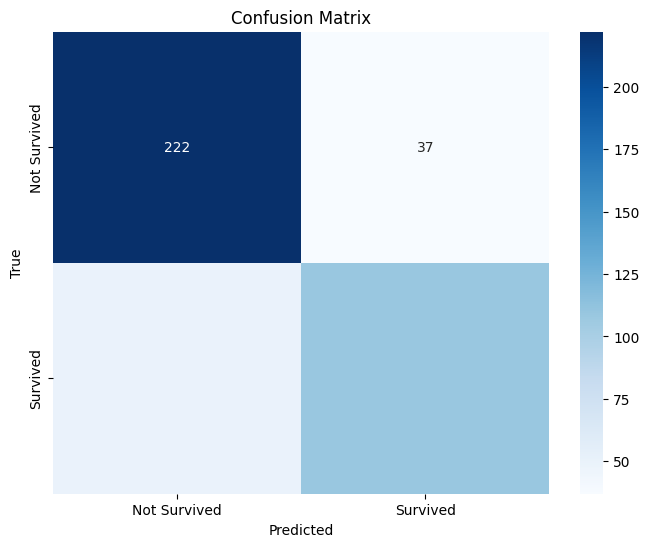

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

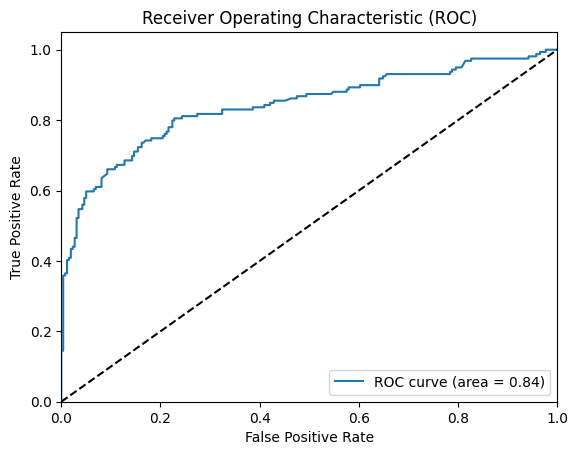

In [46]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') # Random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

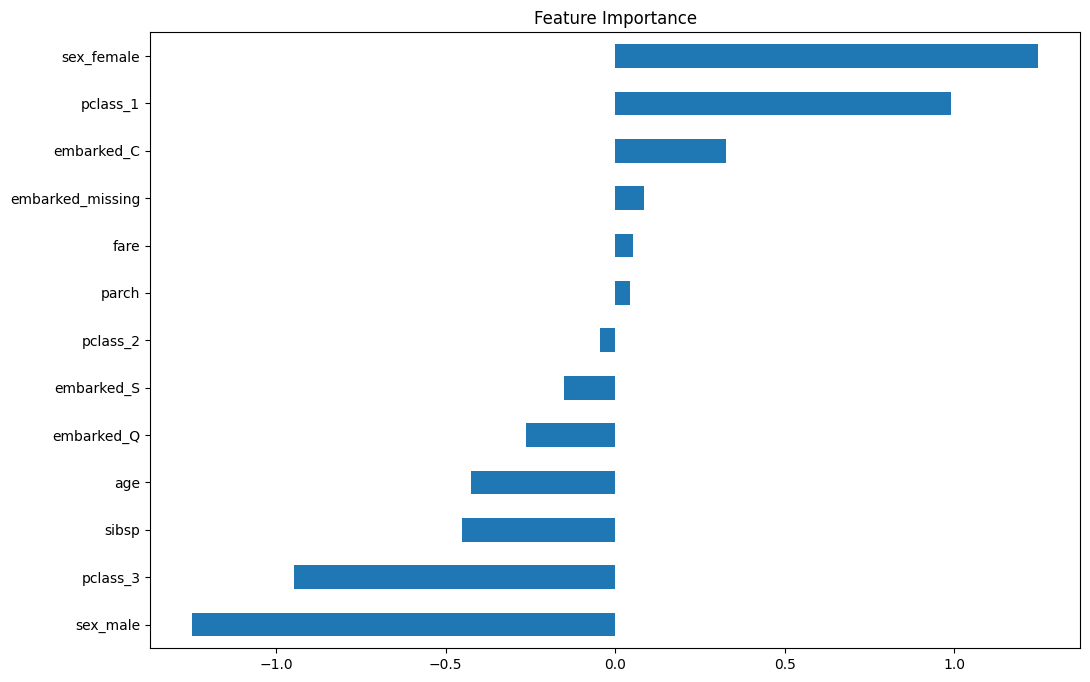

In [47]:
# Getting feature names after one-hot encoding
feature_names = numeric_features + list(model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))

# Getting coefficients
coefficients = model.named_steps['classifier'].coef_.flatten()

# Mapping coefficients to features
feature_importance = pd.Series(coefficients, index=feature_names)

# Plotting
plt.figure(figsize=(12, 8))
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()
